In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

#### This step is done in a separate file, just attached the codes for reference.

In [ ]:
# Slicing and extract columns
columns_to_extract = ['PROPERTY TYPE', 'CITY', 'ZIP OR POSTAL CODE','PRICE','BEDS','BATHS','SQUARE FEET','ELEMENTARY_SCHOOL_RATING','MIDDLE_SCHOOL_RATING','HIGH_SCHOOL_RATING','PRICE_PR_SQFT','REDFIN_ESTIMATE','EST_MONTHLY_PAY','PRICE_HISTORY1_PRICE','PRICE_HISTORY2_PRICE','PRICE_HISTORY3_PRICE']
input_csv_file = 'combined_california2_data.csv'
output_csv_file = 'q6_file.csv'

def extract_columns(input_file, output_file, columns):
    with open(input_file, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        fieldnames = reader.fieldnames

        with open(output_file, 'w', newline='') as csvfile_out:
            writer = csv.DictWriter(csvfile_out, fieldnames=columns)
            writer.writeheader()

            for row in reader:
                extracted_row = {col: row[col] for col in columns}
                writer.writerow(extracted_row)

extract_columns(input_csv_file, output_csv_file, columns_to_extract)

print(f"Columns {', '.join(columns_to_extract)} extracted and saved in {output_csv_file}")

## Load and over view the Dataset

In [2]:
df = pd.read_csv('q6_file.csv')
df.head()

,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,ELEMENTARY_SCHOOL_RATING,MIDDLE_SCHOOL_RATING,HIGH_SCHOOL_RATING,PRICE_PR_SQFT,REDFIN_ESTIMATE,EST_MONTHLY_PAY,PRICE_HISTORY1_PRICE,PRICE_HISTORY2_PRICE,PRICE_HISTORY3_PRICE
0,Single Family Residential,Redwood City,94063,999950,3.0,1.0,1200.0,NaN,3.0,6.0,833.0,1000481.0,7070.0,999950.0,NaN,NaN
1,Multi-Family (2-4 Unit),Redwood City,94063,1398000,3.0,2.0,1730.0,3.0,NaN,6.0,808.0,1416873.0,9885.0,1398000.0,NaN,610000.0
2,Multi-Family (2-4 Unit),Redwood City,94061,1840000,5.0,3.0,2733.0,3.0,NaN,6.0,673.0,1835963.0,13010.0,1840000.0,NaN,NaN
3,Single Family Residential,Redwood City,94061,2089000,3.0,3.0,1991.0,NaN,NaN,6.0,1049.0,2087379.0,14771.0,2089000.0,NaN,NaN
4,Single Family Residential,Woodside,94062,1725000,4.0,2.0,2040.0,NaN,NaN,NaN,846.0,1726717.0,12197.0,1725000.0,NaN,NaN


In [3]:
df.isnull().sum()

PROPERTY TYPE                  0
CITY                           0
ZIP OR POSTAL CODE             0
PRICE                          0
BEDS                         154
BATHS                        176
SQUARE FEET                  131
ELEMENTARY_SCHOOL_RATING     247
MIDDLE_SCHOOL_RATING         273
HIGH_SCHOOL_RATING           165
PRICE_PR_SQFT                131
REDFIN_ESTIMATE              316
EST_MONTHLY_PAY               11
PRICE_HISTORY1_PRICE         235
PRICE_HISTORY2_PRICE        1465
PRICE_HISTORY3_PRICE        1361
dtype: int64

In [5]:
missing+valuedf.isnull().sum()
[df.isnull().sum() > 0]

BEDS                         154
BATHS                        176
SQUARE FEET                  131
ELEMENTARY_SCHOOL_RATING     247
MIDDLE_SCHOOL_RATING         273
HIGH_SCHOOL_RATING           165
PRICE_PR_SQFT                131
REDFIN_ESTIMATE              316
EST_MONTHLY_PAY               11
PRICE_HISTORY1_PRICE         235
PRICE_HISTORY2_PRICE        1465
PRICE_HISTORY3_PRICE        1361
dtype: int64

## Clean null values.

In [6]:
df = df.interpolate()
df.isnull().sum()

PROPERTY TYPE                0
CITY                         0
ZIP OR POSTAL CODE           0
PRICE                        0
BEDS                         0
BATHS                        0
SQUARE FEET                  0
ELEMENTARY_SCHOOL_RATING     1
MIDDLE_SCHOOL_RATING         0
HIGH_SCHOOL_RATING           0
PRICE_PR_SQFT                0
REDFIN_ESTIMATE              0
EST_MONTHLY_PAY              0
PRICE_HISTORY1_PRICE         0
PRICE_HISTORY2_PRICE        16
PRICE_HISTORY3_PRICE         1
dtype: int64

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df.mean())

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df.mode().iloc[0])

df.isnull().sum()

/var/folders/94/s_521g291tv9nnx7jvql6hdm0000gq/T/ipykernel_37668/3206159764.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[numeric_cols] = df[numeric_cols].fillna(df.mean())


PROPERTY TYPE               0
CITY                        0
ZIP OR POSTAL CODE          0
PRICE                       0
BEDS                        0
BATHS                       0
SQUARE FEET                 0
ELEMENTARY_SCHOOL_RATING    0
MIDDLE_SCHOOL_RATING        0
HIGH_SCHOOL_RATING          0
PRICE_PR_SQFT               0
REDFIN_ESTIMATE             0
EST_MONTHLY_PAY             0
PRICE_HISTORY1_PRICE        0
PRICE_HISTORY2_PRICE        0
PRICE_HISTORY3_PRICE        0
dtype: int64

In [7]:
#find NaN values
nan_values = df.isnull()

# Count the number of NaN values in each column
nan_counts = df.isna().sum()

# Count the total number of NaN values in the DataFrame
total_nan_count = df.isna().sum().sum()

# Print the NaN counts for each column
print("NaN Counts for Each Column:")
print(nan_counts)

# Print the total number of NaN values in the DataFrame
print("Total Number of NaN Values:", total_nan_count)

NaN Counts for Each Column:
PROPERTY TYPE               0
CITY                        0
ZIP OR POSTAL CODE          0
PRICE                       0
BEDS                        0
BATHS                       0
SQUARE FEET                 0
ELEMENTARY_SCHOOL_RATING    0
MIDDLE_SCHOOL_RATING        0
HIGH_SCHOOL_RATING          0
PRICE_PR_SQFT               0
REDFIN_ESTIMATE             0
EST_MONTHLY_PAY             0
PRICE_HISTORY1_PRICE        0
PRICE_HISTORY2_PRICE        0
PRICE_HISTORY3_PRICE        0
dtype: int64
Total Number of NaN Values: 0


## Check the numerical and categorical columns

In [9]:
categorical_columns = df.select_dtypes(include=['object'])
print("Categorical Columns:",categorical_columns.columns.tolist())

Categorical Columns: ['PROPERTY TYPE', 'CITY']


In [11]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
non_numerical_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print("Numerical columns:", numerical_columns)
print("\nCategorical Columns:", non_numerical_columns)


Numerical columns: ['ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'ELEMENTARY_SCHOOL_RATING', 'MIDDLE_SCHOOL_RATING', 'HIGH_SCHOOL_RATING', 'PRICE_PR_SQFT', 'REDFIN_ESTIMATE', 'EST_MONTHLY_PAY', 'PRICE_HISTORY1_PRICE', 'PRICE_HISTORY2_PRICE', 'PRICE_HISTORY3_PRICE']

Categorical Columns: ['PROPERTY TYPE', 'CITY']


# Linear Regression Model

### Modelling A (with all factors we sliced)

In [18]:
# Split into train and test sets
features = df[['PROPERTY TYPE', 'CITY', 'ZIP OR POSTAL CODE', 'BEDS', 'BATHS', 'SQUARE FEET', 
                'ELEMENTARY_SCHOOL_RATING', 'MIDDLE_SCHOOL_RATING', 'HIGH_SCHOOL_RATING', 
                'PRICE_PR_SQFT', 'REDFIN_ESTIMATE', 'EST_MONTHLY_PAY', 
                'PRICE_HISTORY1_PRICE', 'PRICE_HISTORY2_PRICE', 'PRICE_HISTORY3_PRICE']]
target = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Set Num & Cat features separately
numeric_features = ['BEDS', 'BATHS', 'SQUARE FEET', 'ELEMENTARY_SCHOOL_RATING', 'MIDDLE_SCHOOL_RATING',
                    'HIGH_SCHOOL_RATING', 'PRICE_PR_SQFT', 'REDFIN_ESTIMATE', 'EST_MONTHLY_PAY',
                    'PRICE_HISTORY1_PRICE', 'PRICE_HISTORY2_PRICE', 'PRICE_HISTORY3_PRICE']
categorical_features = ['PROPERTY TYPE', 'CITY', 'ZIP OR POSTAL CODE']

numeric_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Handle unknown categories
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
pipeline.fit(X_train, y_train)

# Predictions on the test set and check MSE & R^2
predictions = pipeline.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)

Mean Squared Error: 93092136427.86137
R-squared: 0.9752642442285906


In [19]:
# Try different property settings for the model we built
future_data = pd.DataFrame({
    'PROPERTY TYPE': ['Single Family', 'Condo', 'Multi-Family'],
    'CITY': ['Fremont', 'Hayward', 'San Francisco'],
    'ZIP OR POSTAL CODE': ['94536', '94542', '94122'],
    'BEDS': [2, 3, 4],
    'BATHS': [1, 2, 3],
    'SQUARE FEET': [3000, 4000, 2500],
    'ELEMENTARY_SCHOOL_RATING': [8, 7, 6],
    'MIDDLE_SCHOOL_RATING': [7, 6, 5],
    'HIGH_SCHOOL_RATING': [9, 8, 7],
    'PRICE_PR_SQFT': [400, 350, 300],
    'REDFIN_ESTIMATE': [600000, 400000, 550000],
    'EST_MONTHLY_PAY': [2500, 1800, 3000],
    'PRICE_HISTORY1_PRICE': [550000, 380000, 520000],
    'PRICE_HISTORY2_PRICE': [530000, 360000, 510000],
    'PRICE_HISTORY3_PRICE': [510000, 340000, 500000]
})

future_data_processed = pipeline.named_steps['preprocessor'].transform(future_data)
future_predictions = pipeline.named_steps['regressor'].predict(future_data_processed)
print('Future Property Price Predictions:', future_predictions)


Future Property Price Predictions: [362402.46378908 269731.97036543 458375.61408857]


In [20]:
# Get coefficient for Model A
coefficients = pipeline.named_steps['regressor'].coef_
categorical_feature_names = pipeline.named_steps['preprocessor']\
                            .named_transformers_['cat'].named_steps['onehot']\
                            .get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(categorical_feature_names)

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coefficients_df

,Feature,Coefficient
0,BEDS,6467.020684
1,BATHS,10038.854844
2,SQUARE FEET,1253.662011
3,ELEMENTARY_SCHOOL_RATING,-5211.872380
4,MIDDLE_SCHOOL_RATING,-922.580757
...,...,...
266,ZIP OR POSTAL CODE_95139,10951.050223
267,ZIP OR POSTAL CODE_95140,-8880.717091
268,ZIP OR POSTAL CODE_95141,-13073.911710
269,ZIP OR POSTAL CODE_95148,-14166.797139


In [21]:
# Get Math Function for model A
intercept = pipeline.named_steps['regressor'].intercept_
coefficients = pipeline.named_steps['regressor'].coef_

numeric_feature_names = numeric_features
categorical_feature_names = pipeline.named_steps['preprocessor']\
                            .named_transformers_['cat'].named_steps['onehot']\
                            .get_feature_names_out(categorical_features)
feature_names = list(numeric_feature_names) + list(categorical_feature_names)

print("y =", f"{intercept:.2f}", "+", " + ".join([f"({coefficients[i]:.2f}) * {feature_names[i]}" for i in range(len(coefficients))]))

y = 1851368.04 + (6467.02) * BEDS + (10038.85) * BATHS + (1253.66) * SQUARE FEET + (-5211.87) * ELEMENTARY_SCHOOL_RATING + (-922.58) * MIDDLE_SCHOOL_RATING + (2194.83) * HIGH_SCHOOL_RATING + (1966.66) * PRICE_PR_SQFT + (86068.38) * REDFIN_ESTIMATE + (1683842.44) * EST_MONTHLY_PAY + (-12569.44) * PRICE_HISTORY1_PRICE + (-1781.52) * PRICE_HISTORY2_PRICE + (-5655.63) * PRICE_HISTORY3_PRICE + (-114774.20) * PROPERTY TYPE_Condo/Co-op + (2676.69) * PROPERTY TYPE_Mobile/Manufactured Home + (-25659.33) * PROPERTY TYPE_Multi-Family (2-4 Unit) + (106891.35) * PROPERTY TYPE_Multi-Family (5+ Unit) + (70570.80) * PROPERTY TYPE_Other + (-1359.73) * PROPERTY TYPE_Single Family Residential + (-54168.97) * PROPERTY TYPE_Townhouse + (15823.39) * PROPERTY TYPE_Vacant Land + (1329.88) * CITY_Atherton + (-157873.75) * CITY_Bel Air + (12980.66) * CITY_Berkeley + (-7524.33) * CITY_Beverly Hills + (10823.95) * CITY_Burbank + (1470.22) * CITY_Campbell + (-26458.54) * CITY_Canoga Park + (5674.02) * CITY_Castro 

### Modelling B (try to keep with some major factors, and remove some un-necessary ones)

In [22]:
features = df[['PROPERTY TYPE', 'CITY', 'ZIP OR POSTAL CODE', 'BEDS', 'BATHS', 'SQUARE FEET', 
                'ELEMENTARY_SCHOOL_RATING', 'MIDDLE_SCHOOL_RATING', 'HIGH_SCHOOL_RATING', 
                'PRICE_PR_SQFT', 'EST_MONTHLY_PAY']]
target = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


numeric_features = ['BEDS', 'BATHS', 'SQUARE FEET', 'ELEMENTARY_SCHOOL_RATING', 'MIDDLE_SCHOOL_RATING',
                    'HIGH_SCHOOL_RATING', 'PRICE_PR_SQFT', 'EST_MONTHLY_PAY']
categorical_features = ['PROPERTY TYPE', 'CITY', 'ZIP OR POSTAL CODE']
numeric_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Handle unknown categories
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)

future_data = pd.DataFrame({
    'PROPERTY TYPE': ['Single Family', 'Condo', 'Multi-Family'],
    'CITY': ['Fremont', 'Hayward', 'San Francisco'],
    'ZIP OR POSTAL CODE': ['94536', '94542', '94122'],
    'BEDS': [2, 3, 4],
    'BATHS': [1, 2, 3],
    'SQUARE FEET': [3000, 4000, 2500],
    'ELEMENTARY_SCHOOL_RATING': [8, 7, 6],
    'MIDDLE_SCHOOL_RATING': [7, 6, 5],
    'HIGH_SCHOOL_RATING': [9, 8, 7],
    'PRICE_PR_SQFT': [400, 350, 300],
    'EST_MONTHLY_PAY': [2500, 1800, 3000]
})

future_data_processed = pipeline.named_steps['preprocessor'].transform(future_data)
future_predictions = pipeline.named_steps['regressor'].predict(future_data_processed)
print('Future Property Price Predictions:', future_predictions)

Mean Squared Error: 97832056599.08652
R-squared: 0.9740047876060406
Future Property Price Predictions: [345890.45624969 253978.38544371 449416.21027601]


In [23]:
# Get coefficient for Model B
coefficients = pipeline.named_steps['regressor'].coef_
categorical_feature_names = pipeline.named_steps['preprocessor']\
                            .named_transformers_['cat'].named_steps['onehot']\
                            .get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(categorical_feature_names)

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coefficients_df

,Feature,Coefficient
0,BEDS,-1374.892956
1,BATHS,21212.596477
2,SQUARE FEET,1472.554948
3,ELEMENTARY_SCHOOL_RATING,-6338.897200
4,MIDDLE_SCHOOL_RATING,1159.772679
...,...,...
262,ZIP OR POSTAL CODE_95139,-30288.928002
263,ZIP OR POSTAL CODE_95140,-55869.227820
264,ZIP OR POSTAL CODE_95141,-16615.175726
265,ZIP OR POSTAL CODE_95148,-7030.314382


In [24]:
# Get Math Function for model B
intercept = pipeline.named_steps['regressor'].intercept_
coefficients = pipeline.named_steps['regressor'].coef_

numeric_feature_names = numeric_features
categorical_feature_names = pipeline.named_steps['preprocessor']\
                            .named_transformers_['cat'].named_steps['onehot']\
                            .get_feature_names_out(categorical_features)
feature_names = list(numeric_feature_names) + list(categorical_feature_names)

print("y =", f"{intercept:.2f}", "+", " + ".join([f"({coefficients[i]:.2f}) * {feature_names[i]}" for i in range(len(coefficients))]))

y = 1829205.38 + (-1374.89) * BEDS + (21212.60) * BATHS + (1472.55) * SQUARE FEET + (-6338.90) * ELEMENTARY_SCHOOL_RATING + (1159.77) * MIDDLE_SCHOOL_RATING + (1439.59) * HIGH_SCHOOL_RATING + (37.95) * PRICE_PR_SQFT + (1729945.67) * EST_MONTHLY_PAY + (-105506.94) * PROPERTY TYPE_Condo/Co-op + (-1120.97) * PROPERTY TYPE_Mobile/Manufactured Home + (-135.01) * PROPERTY TYPE_Multi-Family (2-4 Unit) + (10532.88) * PROPERTY TYPE_Multi-Family (5+ Unit) + (56988.82) * PROPERTY TYPE_Other + (33677.33) * PROPERTY TYPE_Single Family Residential + (-40725.17) * PROPERTY TYPE_Townhouse + (46289.07) * PROPERTY TYPE_Vacant Land + (42434.89) * CITY_Atherton + (-78641.02) * CITY_Bel Air + (-4929.36) * CITY_Berkeley + (51476.00) * CITY_Beverly Hills + (-520.42) * CITY_Burbank + (2852.57) * CITY_Campbell + (35923.49) * CITY_Canoga Park + (16758.28) * CITY_Castro Valley + (-9793.82) * CITY_Chatsworth + (-23890.03) * CITY_Clayton + (-7814.72) * CITY_Concord + (-3116.92) * CITY_Culver City + (12863.33) * CI

## Visualization Part (Linear regression model)

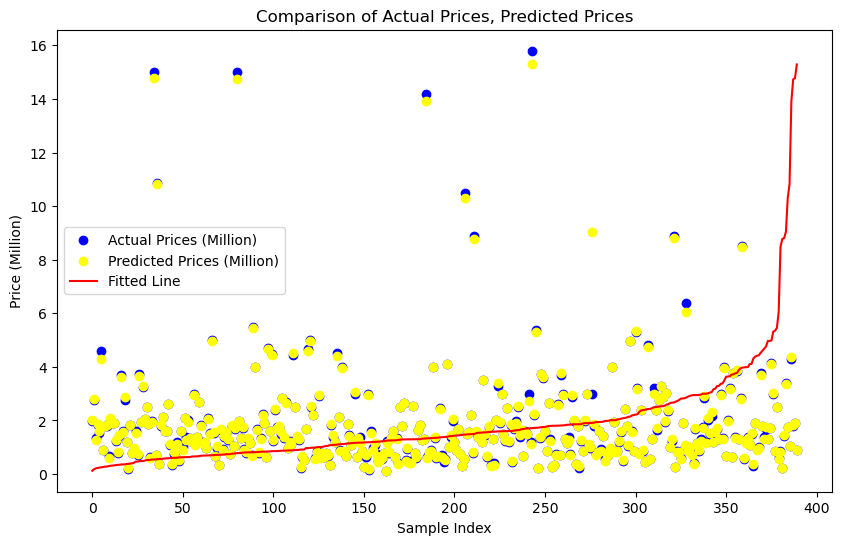

In [30]:
y_test_million = y_test / 1e6
predictions_million = predictions / 1e6

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test_million, color='blue', label='Actual Prices (Million)')
plt.scatter(range(len(predictions)), predictions_million, color='yellow', label='Predicted Prices (Million)')
#plt.scatter(range(len(future_predictions)), future_predictions, color='black', label='Future Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Price (Million)')
plt.legend()
plt.title('Comparison of Actual Prices, Predicted Prices')

sorted_indices = np.argsort(predictions)
sorted_predictions = predictions[sorted_indices] / 1e6

plt.plot(range(len(sorted_predictions)), sorted_predictions, color='red', label='Fitted Line')

plt.legend()
plt.show()

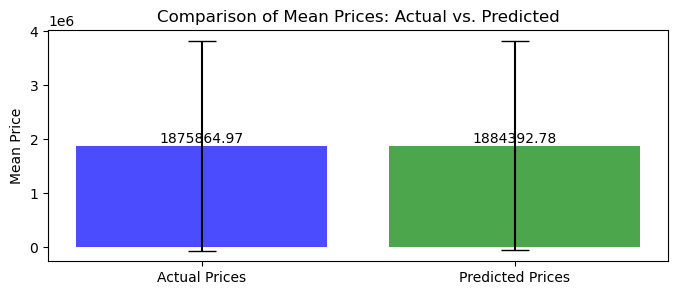

In [27]:
actual_prices = y_test
predicted_prices = predictions

labels = ['Actual Prices', 'Predicted Prices']
heights = [np.mean(actual_prices), np.mean(predicted_prices)]
errors = [np.std(actual_prices), np.std(predicted_prices)]
plt.figure(figsize=(8, 3))

bars = plt.bar(labels, heights, yerr=errors, color=['blue', 'green'], alpha=0.7, capsize=10)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')

plt.ylabel('Mean Price')
plt.title('Comparison of Mean Prices: Actual vs. Predicted')
plt.show()

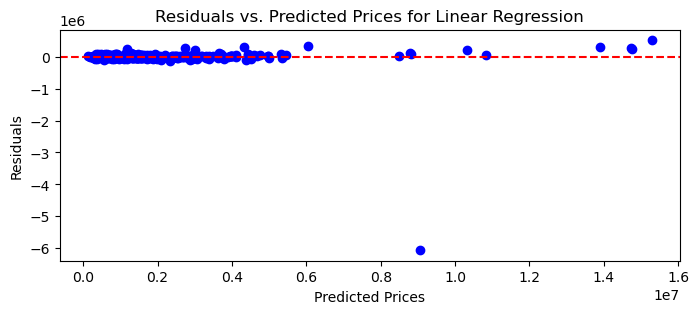

In [29]:
residuals = y_test - predictions
plt.figure(figsize=(8, 3))
plt.scatter(predictions, residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices for Linear Regression')
plt.show()

# Random Forest Model

In [33]:
features = df[['PROPERTY TYPE', 'CITY', 'ZIP OR POSTAL CODE', 'BEDS', 'BATHS', 'SQUARE FEET', 
                'ELEMENTARY_SCHOOL_RATING', 'MIDDLE_SCHOOL_RATING', 'HIGH_SCHOOL_RATING', 
                'PRICE_PR_SQFT', 'REDFIN_ESTIMATE', 'EST_MONTHLY_PAY', 
                'PRICE_HISTORY1_PRICE', 'PRICE_HISTORY2_PRICE', 'PRICE_HISTORY3_PRICE']]
target = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

numeric_features = ['BEDS', 'BATHS', 'SQUARE FEET', 'ELEMENTARY_SCHOOL_RATING', 'MIDDLE_SCHOOL_RATING',
                    'HIGH_SCHOOL_RATING', 'PRICE_PR_SQFT', 'REDFIN_ESTIMATE', 'EST_MONTHLY_PAY',
                    'PRICE_HISTORY1_PRICE', 'PRICE_HISTORY2_PRICE', 'PRICE_HISTORY3_PRICE']
categorical_features = ['PROPERTY TYPE', 'CITY', 'ZIP OR POSTAL CODE']

numeric_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])  # You can adjust the number of estimators as needed
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)

future_data = pd.DataFrame({
    'PROPERTY TYPE': ['Single Family', 'Condo', 'Multi-Family'],
    'CITY': ['Fremont', 'Hayward', 'San Francisco'],
    'ZIP OR POSTAL CODE': ['94536', '94542', '94122'],
    'BEDS': [3, 2, 4],
    'BATHS': [2, 1, 3],
    'SQUARE FEET': [2000, 1200, 2500],
    'ELEMENTARY_SCHOOL_RATING': [8, 7, 6],
    'MIDDLE_SCHOOL_RATING': [7, 6, 5],
    'HIGH_SCHOOL_RATING': [9, 8, 7],
    'PRICE_PR_SQFT': [400, 350, 300],
    'REDFIN_ESTIMATE': [600000, 400000, 550000],
    'EST_MONTHLY_PAY': [2500, 1800, 3000],
    'PRICE_HISTORY1_PRICE': [550000, 380000, 520000],
    'PRICE_HISTORY2_PRICE': [530000, 360000, 510000],
    'PRICE_HISTORY3_PRICE': [510000, 340000, 500000]
})

future_data_processed = pipeline.named_steps['preprocessor'].transform(future_data)
future_predictions = pipeline.named_steps['regressor'].predict(future_data_processed)
print('Future Property Price Predictions:', future_predictions)

Mean Squared Error: 89735009755.08913
R-squared: 0.9761562751632951
Future Property Price Predictions: [360614.44 293975.98 436461.64]


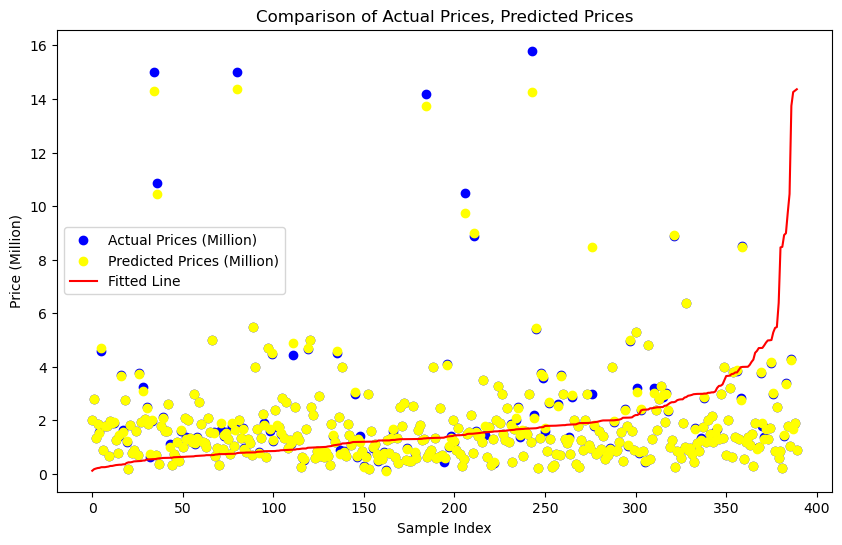

In [34]:
y_test_million = y_test / 1e6
predictions_million = predictions / 1e6

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test_million, color='blue', label='Actual Prices (Million)')
plt.scatter(range(len(predictions)), predictions_million, color='yellow', label='Predicted Prices (Million)')
#plt.scatter(range(len(future_predictions)), future_predictions, color='black', label='Future Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Price (Million)')
plt.legend()
plt.title('Comparison of Actual Prices, Predicted Prices')

sorted_indices = np.argsort(predictions)
sorted_predictions = predictions[sorted_indices] / 1e6

plt.plot(range(len(sorted_predictions)), sorted_predictions, color='red', label='Fitted Line')

plt.legend()
plt.show()

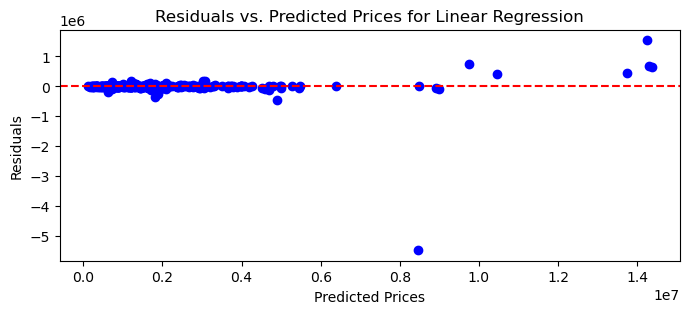

In [36]:
residuals = y_test - predictions
plt.figure(figsize=(8, 3))
plt.scatter(predictions, residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices for Linear Regression')
plt.show()